<a href="https://colab.research.google.com/github/gustavoramos82/Classificando-Fake-News-/blob/main/Classificando_Fake_News_An%C3%A1lise_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando Fake News

Neste texto será elaborado um modelo de rede neural para classificar se um texto é uma fake news ou não

O dataset foi pego no *kaggle* no qual pode ser acessado [aqui](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv). 

Vai ser feito uma análise inicial, depois um pré-tratamento, modelagem e avaliação.

## Passos

A primeira parte desse projeto consiste em fazer uma análise exploratória depois será feita a modelagem como o uso de **redes neurais artificiais (RNA)**.

In [1]:
# Importando as blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
true = pd.read_csv('/content/drive/MyDrive/Datasets/Fake news deep/True.csv') # dataset com as noticias verdadeiras
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('/content/drive/MyDrive/Datasets/Fake news deep/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Dicionário dos Dados

- **title**: Título do artigo
- **text**: Texto do artigo
- **subject**: Assunto tratado do artigo
- **date**: Data em que foi postado

In [4]:
f'O número de linhas e colunas da dos datset verdadeiro é {true.shape} e as falsas é {fake.shape}'

'O número de linhas e colunas da dos datset verdadeiro é (21417, 4) e as falsas é (23481, 4)'

## Análise Exploratória

Text(0.5, 0, 'Quantidade')

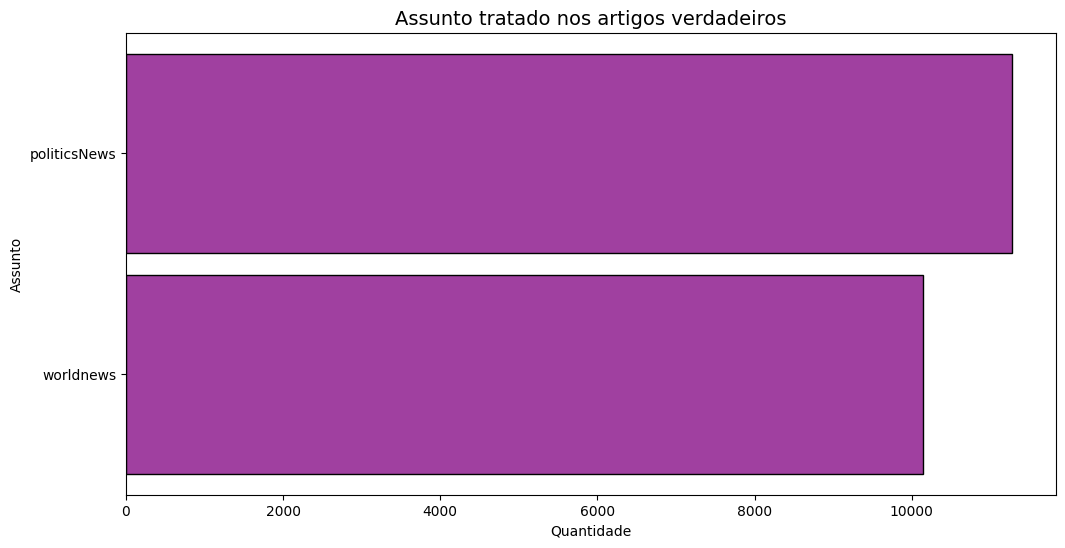

In [5]:
plt.figure(figsize=(12,6))
plt.title('Assunto tratado nos artigos verdadeiros',fontsize=14)
sns.histplot(y='subject',data=true,color='purple',shrink=0.9)
plt.ylabel('Assunto')
plt.xlabel('Quantidade')

Text(0.5, 0, 'Quantidade')

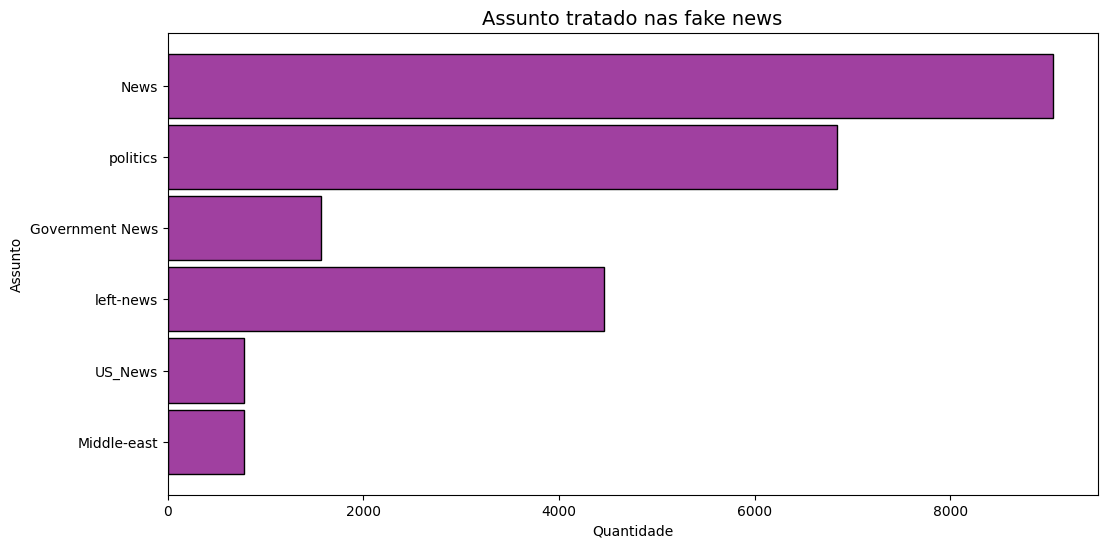

In [6]:
plt.figure(figsize=(12,6))
plt.title('Assunto tratado nas fake news',fontsize=14)
sns.histplot(y='subject',data=fake,color='purple',shrink=0.9)
plt.ylabel('Assunto')
plt.xlabel('Quantidade')

### Pré-Tratamento

In [7]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
def clean(text):                                                 
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
true['title'] = true['title'].apply(clean)
true['text'] = true['text'].apply(clean)

fake['title'] = fake['title'].apply(clean)
fake['text'] = fake['text'].apply(clean)

In [9]:
true.head()

,title,text,subject,date
0,us budget fight loom republican flip fiscal sc...,washington reuter head conserv republican fac...,politicsNews,"December 31, 2017"
1,us militari accept transgend recruit monday pe...,washington reuter transgend peopl allow first...,politicsNews,"December 29, 2017"
2,senior us republican senat let mr mueller job,washington reuter special counsel investig li...,politicsNews,"December 31, 2017"
3,fbi russia probe help australian diplomat tipo...,washington reuter trump campaign advis georg ...,politicsNews,"December 30, 2017"
4,trump want postal servic charg much amazon shi...,seattlewashington reuter presid donald trump ...,politicsNews,"December 29, 2017"


In [10]:
fake.head()

,title,text,subject,date
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,"December 31, 2017"
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,"December 31, 2017"
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,"December 30, 2017"
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,"December 29, 2017"
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,"December 25, 2017"


In [12]:
true['date'] = pd.to_datetime(true['date'],errors='coerce')

fake['date'] = pd.to_datetime(fake['date'],errors='coerce')

In [13]:
true.head()

,title,text,subject,date
0,us budget fight loom republican flip fiscal sc...,washington reuter head conserv republican fac...,politicsNews,2017-12-31
1,us militari accept transgend recruit monday pe...,washington reuter transgend peopl allow first...,politicsNews,2017-12-29
2,senior us republican senat let mr mueller job,washington reuter special counsel investig li...,politicsNews,2017-12-31
3,fbi russia probe help australian diplomat tipo...,washington reuter trump campaign advis georg ...,politicsNews,2017-12-30
4,trump want postal servic charg much amazon shi...,seattlewashington reuter presid donald trump ...,politicsNews,2017-12-29


In [14]:
fake.head()

,title,text,subject,date
0,donald trump send embarrass new year eve mess...,donald trump wish american happi new year leav...,News,2017-12-31
1,drunk brag trump staffer start russian collus...,hous intellig committe chairman devin nune go ...,News,2017-12-31
2,sheriff david clark becom internet joke threa...,friday reveal former milwauke sheriff david cl...,News,2017-12-30
3,trump obsess even obama name code websit imag,christma day donald trump announc would back ...,News,2017-12-29
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,2017-12-25


## Análise inicial do texto

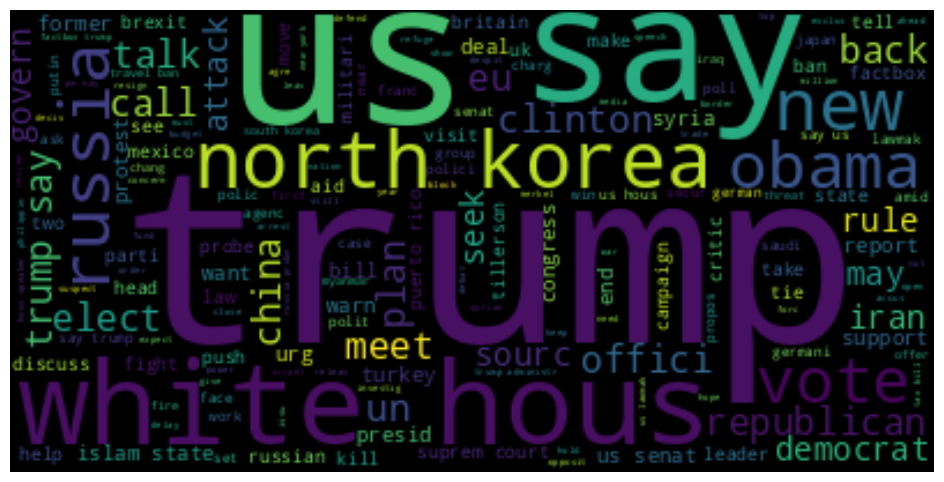

In [16]:
text_true = " ".join(i for i in true.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

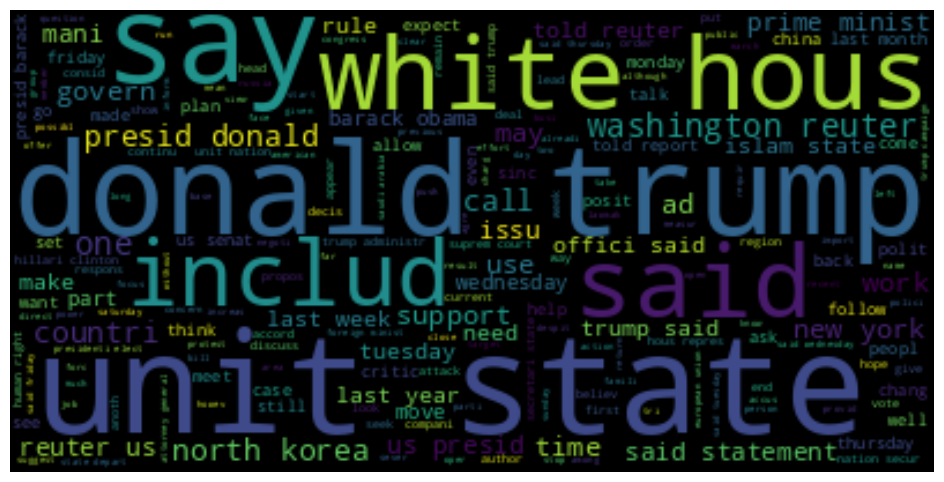

In [21]:
text_true_sub = " ".join(i for i in true.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true_sub)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

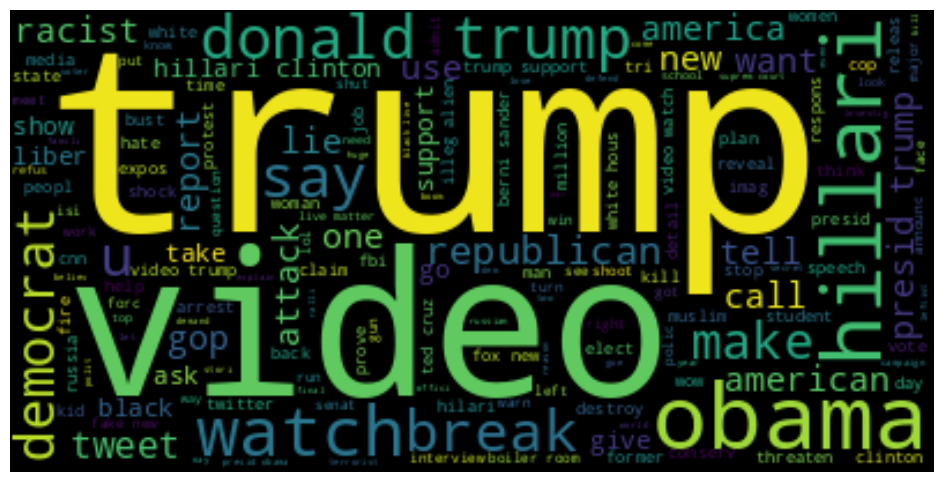

In [19]:
text_fake = " ".join(i for i in fake.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_fake)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

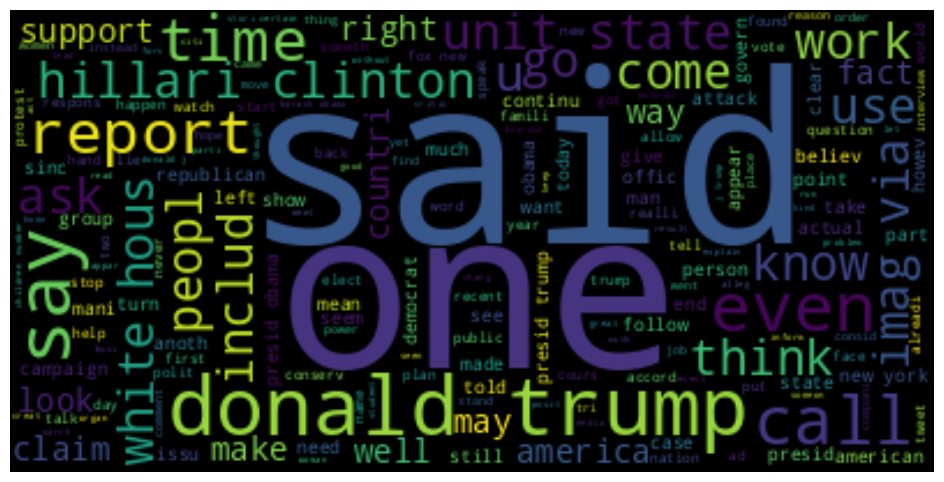

In [22]:
text_fake_sub = " ".join(i for i in fake.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_fake_sub)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
true['subject'].value_counts().index


Index(['politicsNews', 'worldnews'], dtype='object')

Analisando True de acordo com o assunto do artigo

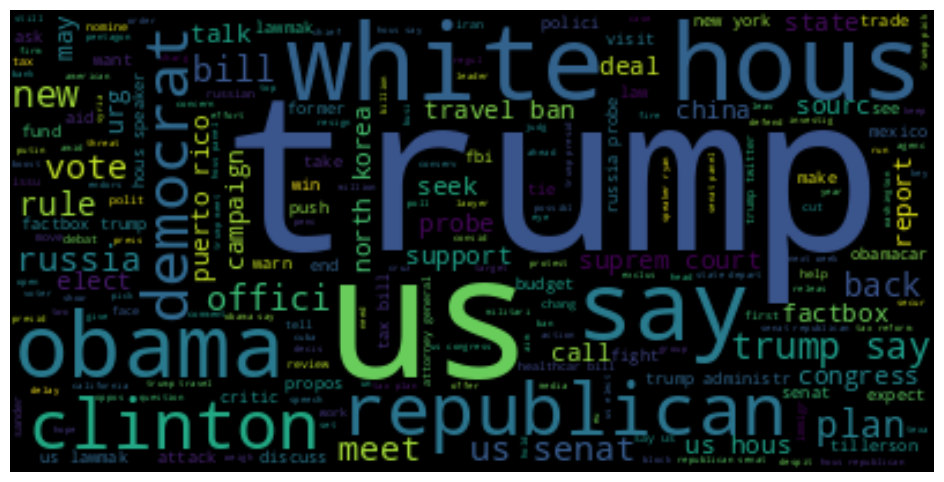

In [27]:
text_true_pol = " ".join(i for i in true[true['subject']=='politicsNews']['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true_pol)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

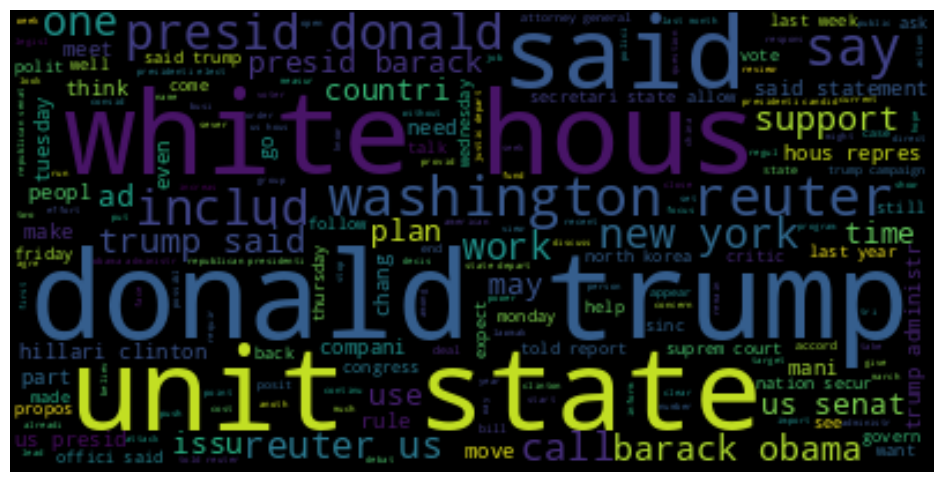

In [28]:
text_true_pol_text = " ".join(i for i in true[true['subject']=='politicsNews']['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true_pol_text)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

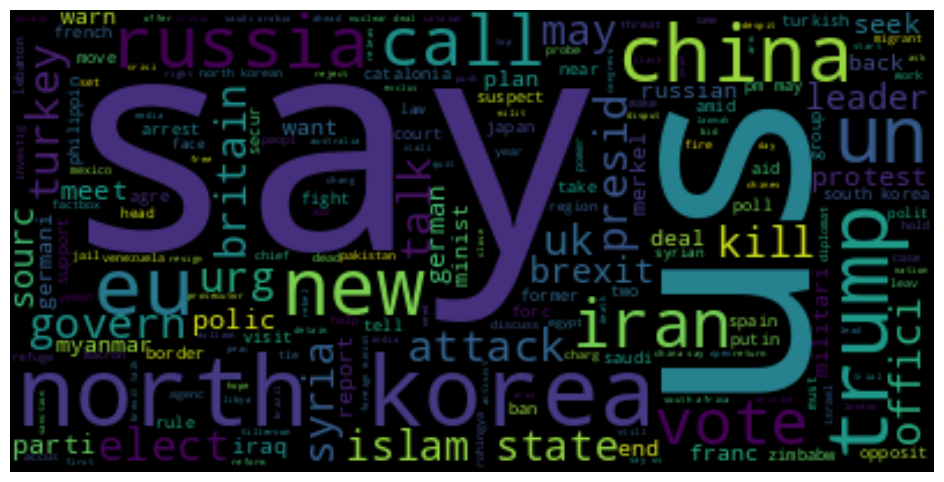

In [29]:
text_true_pol = " ".join(i for i in true[true['subject']=='worldnews']['title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true_pol)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

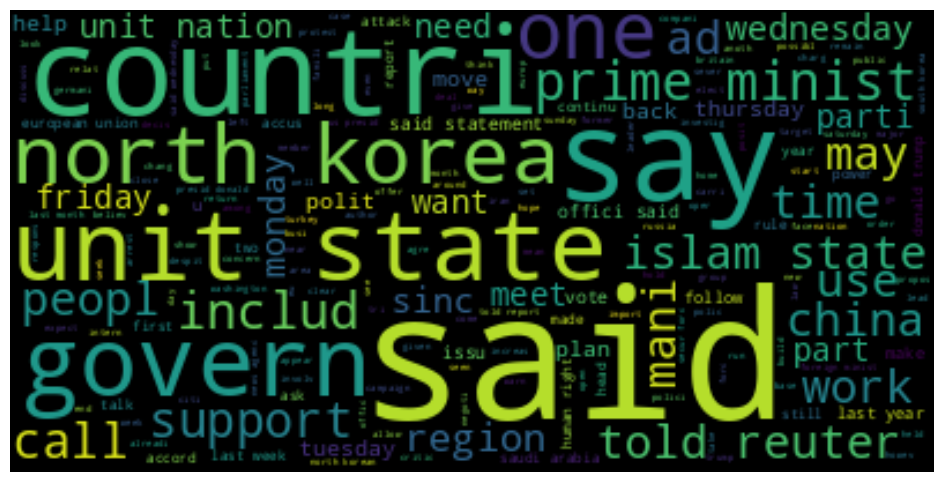

In [30]:
text_true_pol_text = " ".join(i for i in true[true['subject']=='worldnews']['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text_true_pol_text)
plt.figure( figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
true.to_csv('True_tratado.csv')
fake.to_csv('Fake_tratado.csv')